<간단한 신경망 만들기 (Basic)
1. 사인 함수 예측하기
2. 보스턴 집값 예측하기: 회귀분석
3. 손글씨 분류하기: 다중분류

- 모듈: nn.Module 파이토치 기본 객체
- MSE 평균 제곱 오차: Mean Squared Error. 두 값의 제곱의 평균, 회귀 문제에 사용
- CE 크로스 엔트로피: Cross entropy. 두 확률 분포의 차, 분류에서 사용

**1. 사인 함수 예측하기**

In [2]:
import math
import torch
import matplotlib.pyplot as plt

In [13]:
#linspace 이용해서 1000개 정도의 점 추출 -pi ~ +pi
#linspace: linearly spaced vectors. 원하는 시작점과 끝점에 해당하는 구역에 대해 동일한 간격으로 특정 갯수만큼 벡터를 생성하는 것이 목적
x=torch.linspace(-math.pi, math.pi, 1000) #(시작점, 끝점, 분할) ex) (0,50,5) -> 10 20 30 40 50

# sin 곡선 추출
y=torch.sin(x)

#임의의 기중치(계수)를 뽑아 예측용 y만들기 (3차 다항식)
a=torch.randn(())
b=torch.randn(())
c=torch.randn(())
d=torch.randn(())

#3차 다항식 정의
y_random=a*x**3+b*x**2+c*x+d #a b c d 4개 가중치 학습


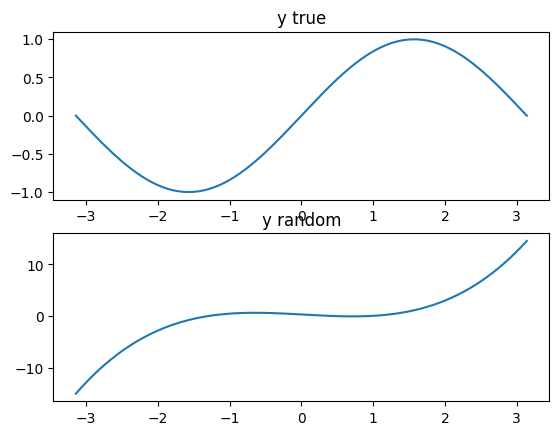

In [16]:
#sin곡선 그래프 출력
plt.subplot(2,1,1)
plt.title("y true")
plt.plot(x,y)

#예측용 y값으로 sin곡선 만들기
plt.subplot(2,1,2)
plt.title("y random")
plt.plot(x,y_random)

plt.show()

-> 학습 전후를 비교하는 학습률을 얼만큼 지정했을 때, 손실함수가 정의가 되고, epoch와 손실함수를 지정을 할 수가 있고, 그거에 따른 미분 값을 적용해서 손실함수의 평균 제곱의 오차를 나타내는 기울기를 검색하고, 가중업데이트의 기울기 반대방향으로 작업하는 경사하강법을 이용해서, y true와 y 예측 pred, y random 값을 비교해서 그래프로 확인 가능함

epoch1 loss:4.857635974884033
epoch101 loss:4.778676986694336
epoch201 loss:4.7142333984375
epoch301 loss:4.661631107330322
epoch401 loss:4.618692398071289
epoch501 loss:4.583633899688721
epoch601 loss:4.5550079345703125
epoch701 loss:4.531625747680664
epoch801 loss:4.5125322341918945
epoch901 loss:4.496933937072754
epoch1001 loss:4.484189987182617
epoch1101 loss:4.47377872467041
epoch1201 loss:4.465270042419434
epoch1301 loss:4.458315372467041
epoch1401 loss:4.452630043029785
epoch1501 loss:4.4479827880859375
epoch1601 loss:4.444181442260742
epoch1701 loss:4.441073894500732
epoch1801 loss:4.438529968261719
epoch1901 loss:4.436450004577637


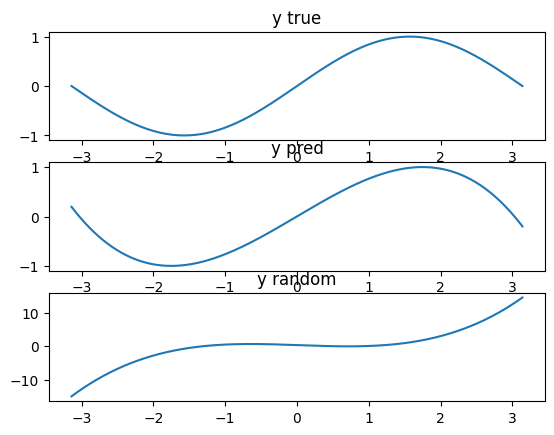

In [24]:
#학습 전후 비교하기

learning_rate=1e-6 #10의 -6승 #학습률 정의

for epoch in range(2000):
  y_pred=a*x**3+b*x**2+c*x+d

  loss=(y_pred-y).pow(2).sum().item() #손실함수 정의
  if epoch % 100 == 0: #100으로 나눴을 때 나머지가 0이면
    print(f"epoch{epoch+1} loss:{loss}")

  grad_y_pred=2.0*(y_pred-y) #미분값 기울기

  #a b c d에 대한 손실함수
  grad_a=(grad_y_pred*x**3).sum()
  grad_b=(grad_y_pred*x**2).sum()
  grad_c=(grad_y_pred*x).sum()
  grad_d=(grad_y_pred).sum()

  #가중치 업데이트 (경사하강법)
  a-=learning_rate*grad_a #기울기의 반대방향 a=a-(learning_rate*grad_a)
  #a에서 학습률의 곱을 빼고, grad_a는 손실을 줄이는 방향으로 값을 업데이트함
  b-=learning_rate*grad_b
  c-=learning_rate*grad_c
  d-=learning_rate*grad_d

#그래프 그리기
plt.subplot(3,1,1)
plt.title('y true')
plt.plot(x,y)

plt.subplot(3,1,2)
plt.title('y pred')
plt.plot(x,y_pred)

plt.subplot(3,1,3)
plt.title('y random')
plt.plot(x,y_random)

plt.show()

-> epoch이 커질수록, loss값이 점점 작아짐

-> y_random보다 y_pred 예측값이 정확도가 더 높음